# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

df = pd.read_csv('previsao_de_renda.csv')
print(df.head())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

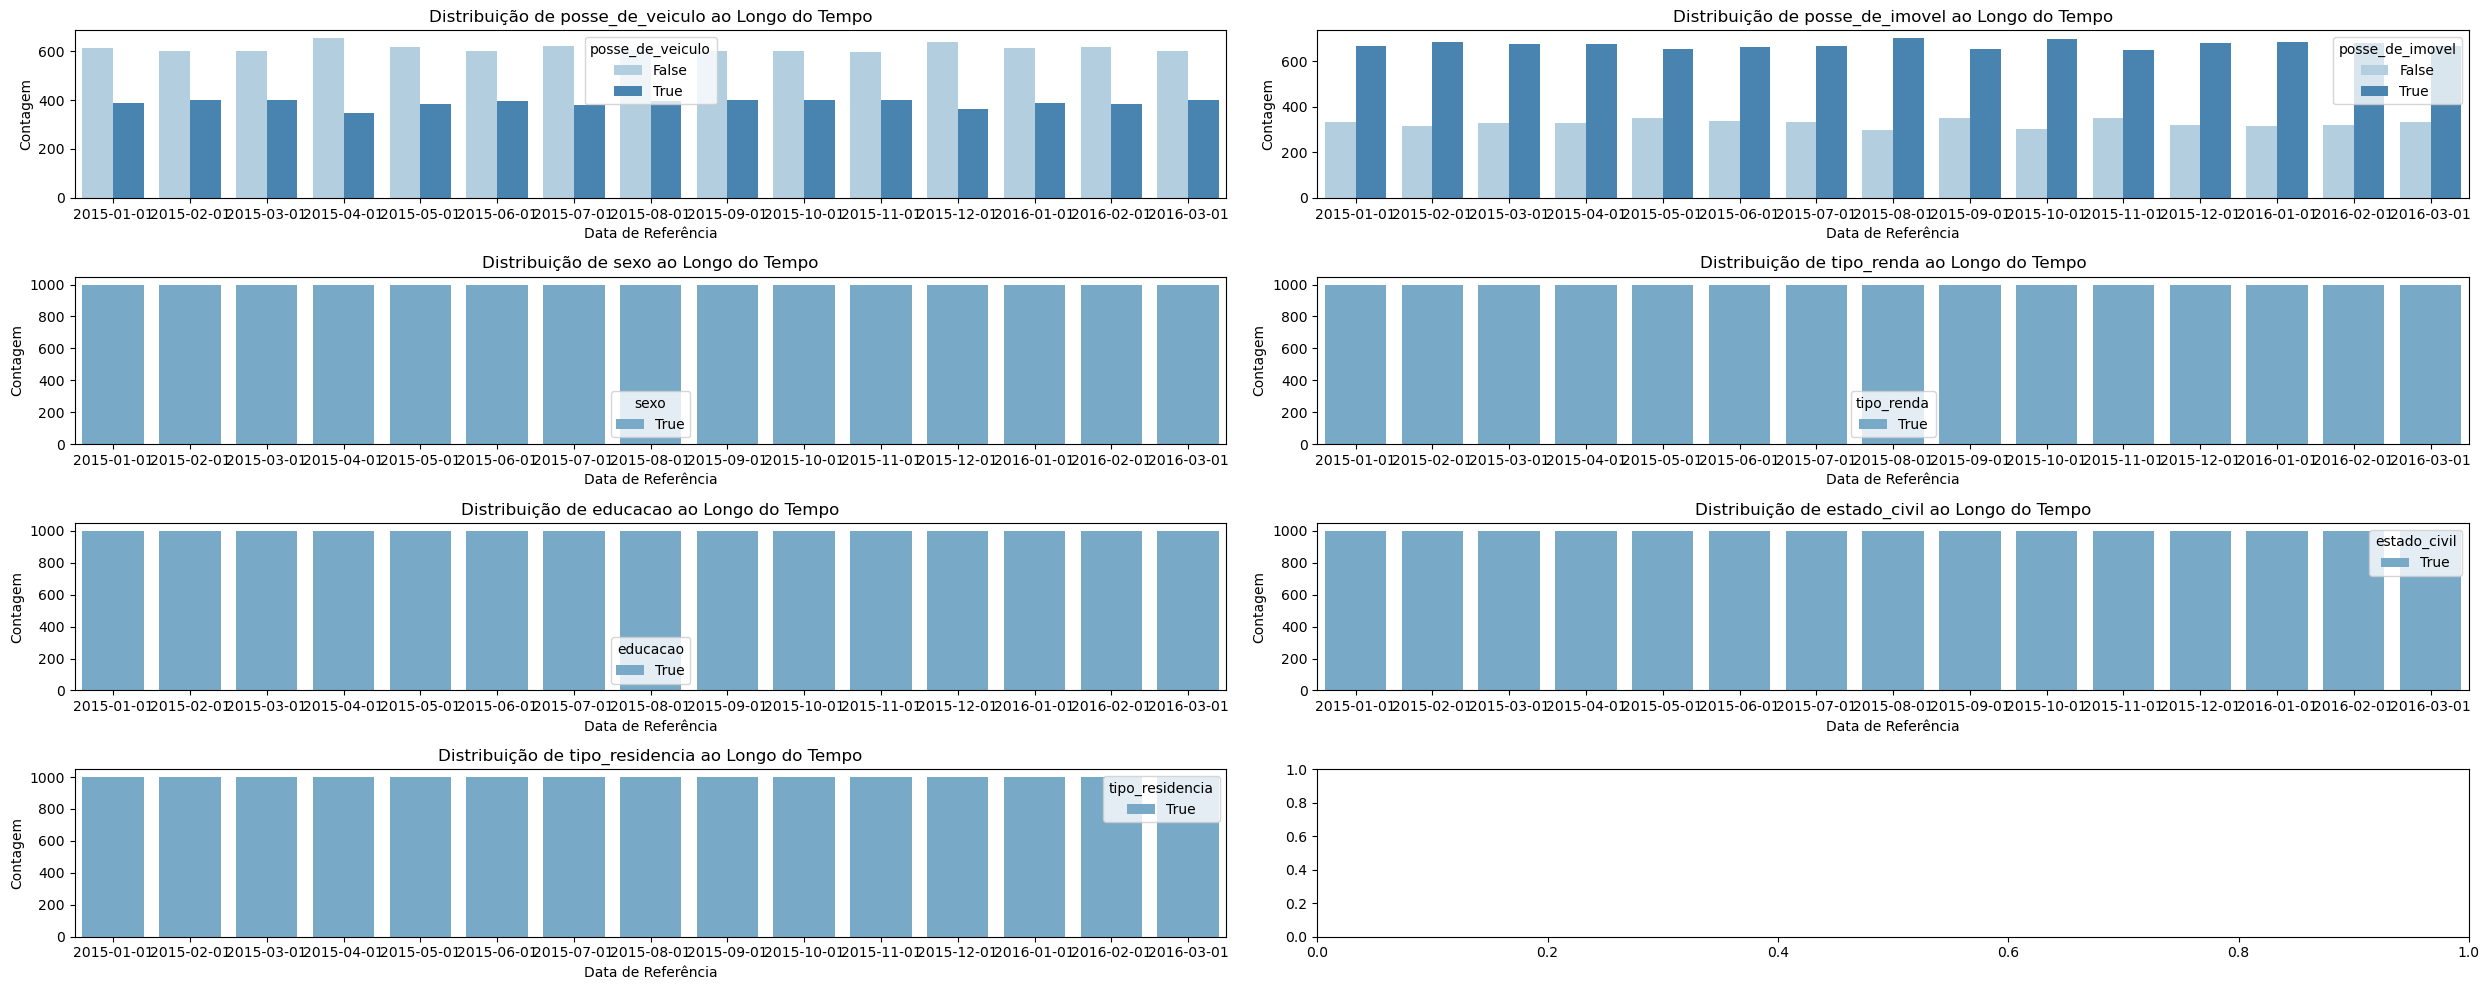

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(25, 10))
axs = axs.flatten()

# Lista de variáveis
variaveis = ['posse_de_veiculo', 'posse_de_imovel', 'sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gráficos para cada variável
for i, var in enumerate(variaveis):
    # Transformar em True/False
    df[var] = df[var].astype(bool)

    # Criar um countplot com data_ref no eixo x
    sns.countplot(data=df, x='data_ref', hue=var, ax=axs[i], palette='Blues')

    # Configurações do gráfico
    axs[i].set_title(f'Distribuição de {var} ao Longo do Tempo')
    axs[i].set_xlabel('Data de Referência')
    axs[i].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

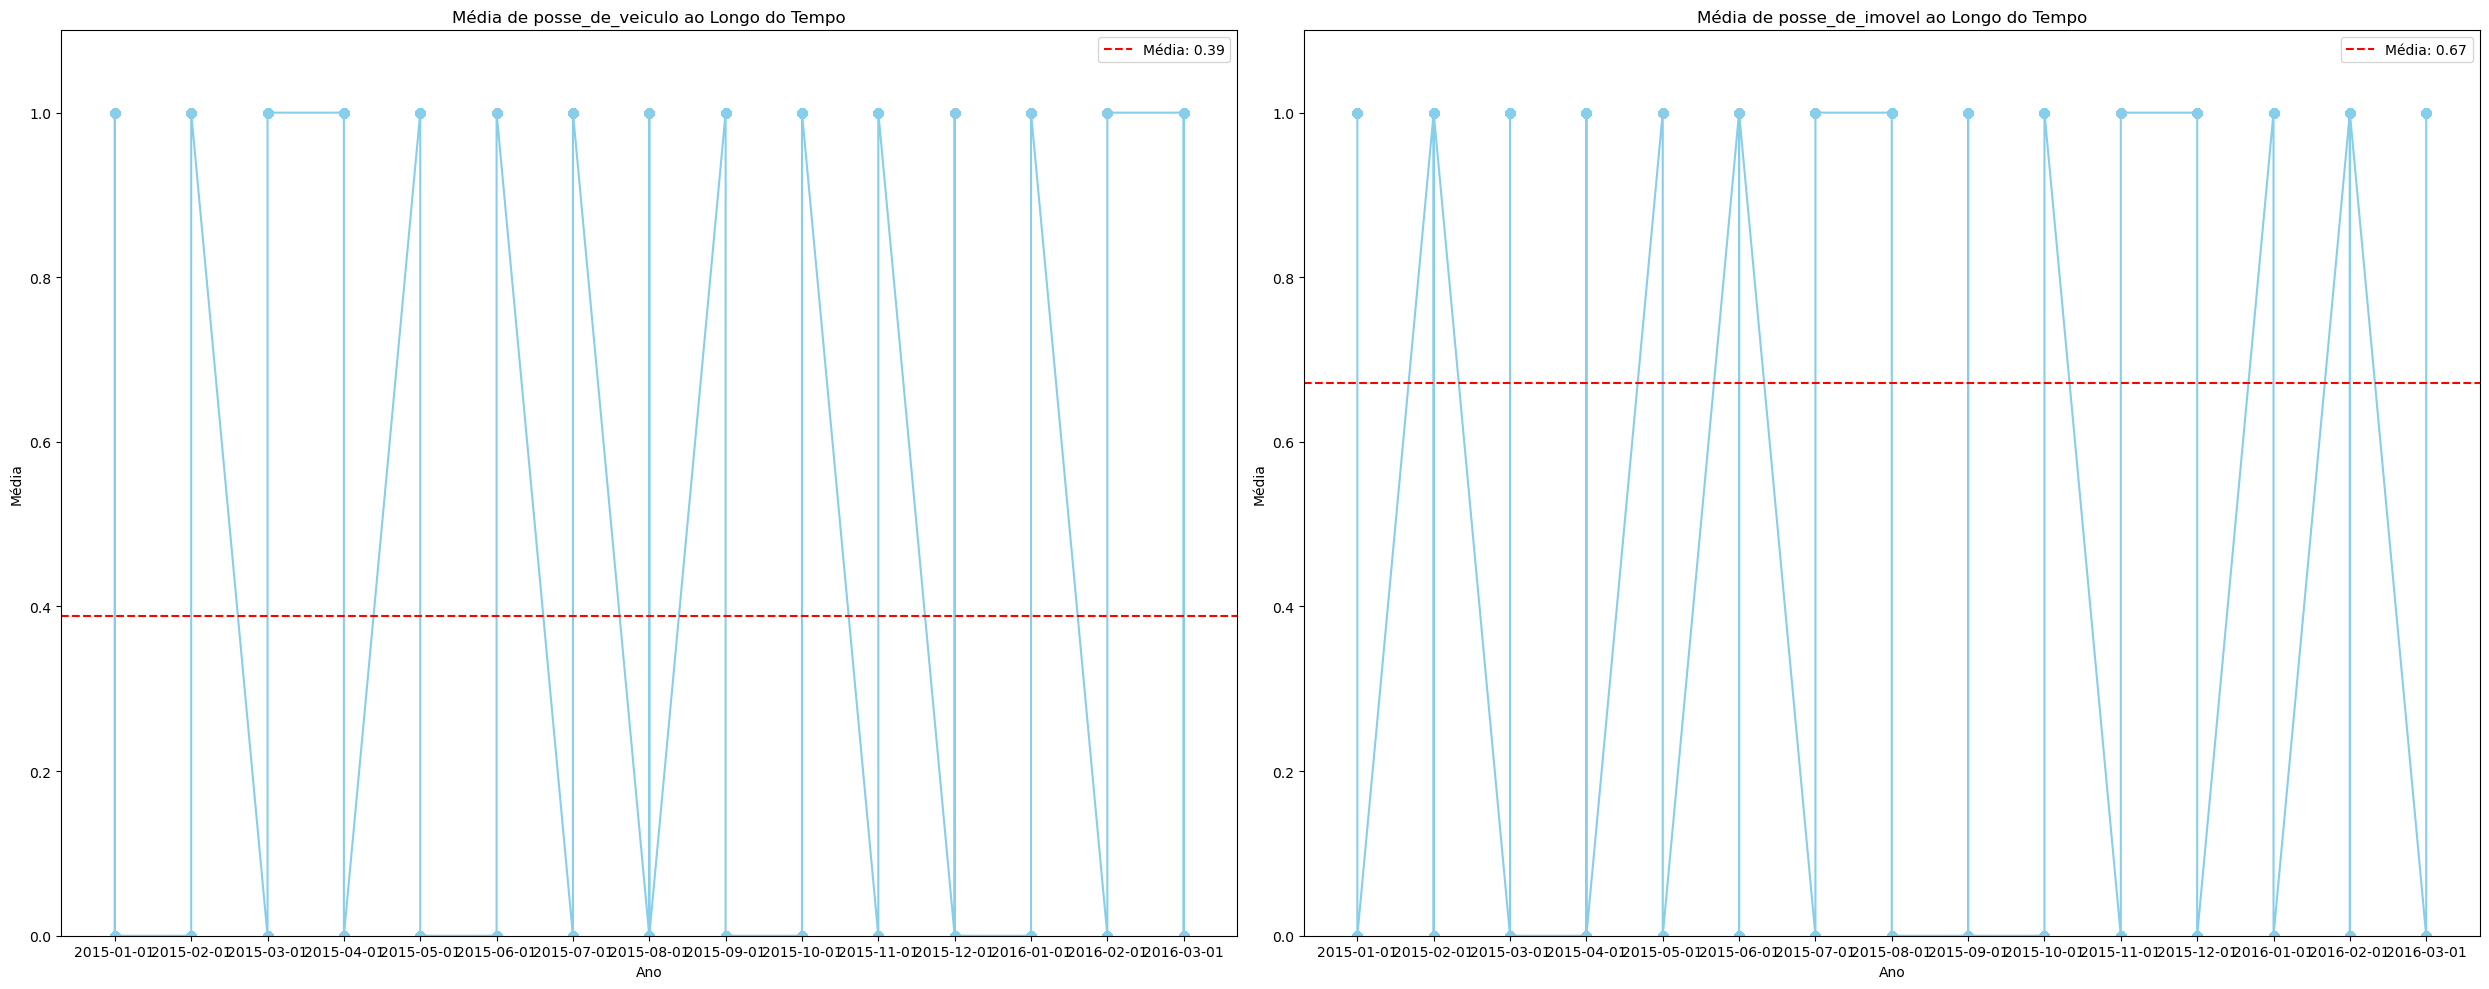

In [53]:

fig, axs = plt.subplots(1, 2, figsize=(25, 10))
axs = axs.flatten()

# Lista de variáveis
variaveis = ['posse_de_veiculo', 'posse_de_imovel']

# Gráficos para cada variável
for i, var in enumerate(variaveis):
    # Transformar em True/False
    df[var] = df[var].astype(bool)

    # Calcular a média
    media = df[var].mean()

    # Plotar
    axs[i].plot(df['data_ref'], df[var], marker='o', color='skyblue')
    axs[i].set_title(f'Média de {var} ao Longo do Tempo')
    axs[i].set_xlabel('Ano')
    axs[i].set_ylabel('Média')
    axs[i].set_ylim(0, 1.1) 
    # Adicionar linha de média
    axs[i].axhline(y=media, color='red', linestyle='--', label=f'Média: {media:.2f}')
    axs[i].legend()

plt.tight_layout()
plt.show()


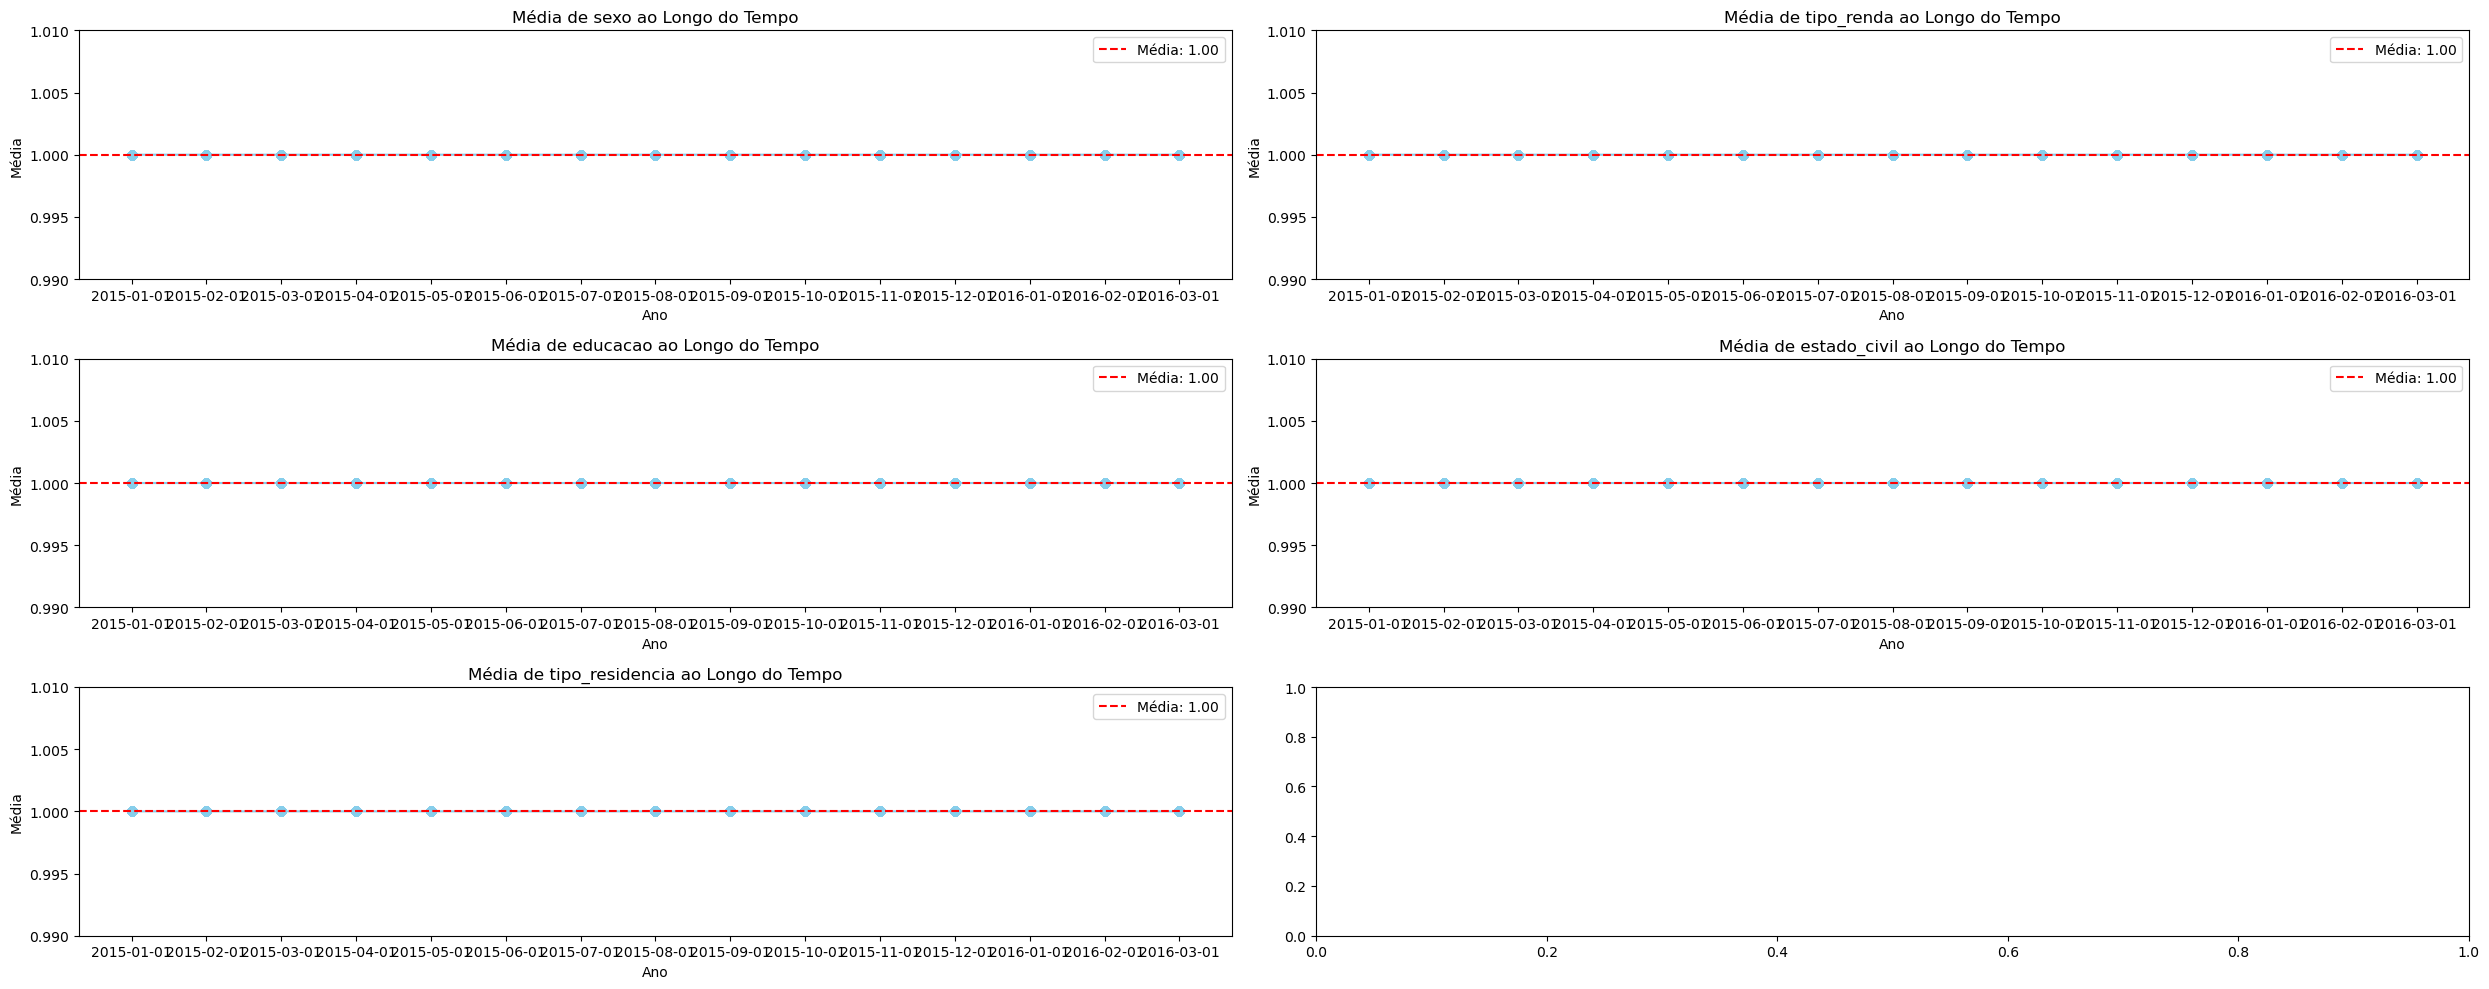

In [55]:

fig, axs = plt.subplots(3, 2, figsize=(25, 10))
axs = axs.flatten()

# Lista de variáveis
variaveis = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gráficos para cada variável
for i, var in enumerate(variaveis):
    # Transformar em True/False
    df[var] = df[var].astype(bool)

    # Calcular a média
    media = df[var].mean()

    # Plotar
    axs[i].plot(df['data_ref'], df[var], marker='o', color='skyblue')
    axs[i].set_title(f'Média de {var} ao Longo do Tempo')
    axs[i].set_xlabel('Ano')
    axs[i].set_ylabel('Média')
    axs[i].set_ylim(0.99, 1.01) 

    # Adicionar linha de média
    axs[i].axhline(y=media, color='red', linestyle='--', label=f'Média: {media:.2f}')
    axs[i].legend()

plt.tight_layout()
plt.show()


Ao verificar os gráficos podemos ver que eles eles são parecidos o que no meu ponto de vista não vejo necessidade de alteração ou investigação